In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima_model import ARIMAResults,ARIMA,ARMAResults,ARMA

In [3]:
from pmdarima import auto_arima

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
df1=pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [6]:
df1.index.freq='D'

<AxesSubplot:xlabel='Date'>

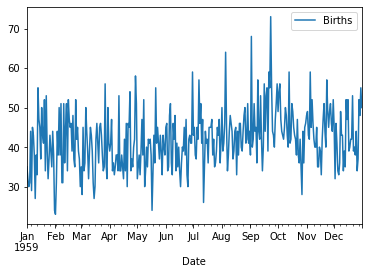

In [8]:
df1.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
test=adfuller(df1['Births'])

In [11]:
test

(-4.808291253559764,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [12]:
stepfit=auto_arima(df1['Births'],seasonal=False)

In [18]:
train_set=df1.iloc[:120]

In [17]:
auto_arima(train_set['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sat, 26 Jun 2021   AIC                            823.489
Time:                        20:10:25   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
df2=pd.read_csv('TradeInventories.csv',index_col='Date',parse_dates=True)

In [23]:
df2.index.freq='MS'

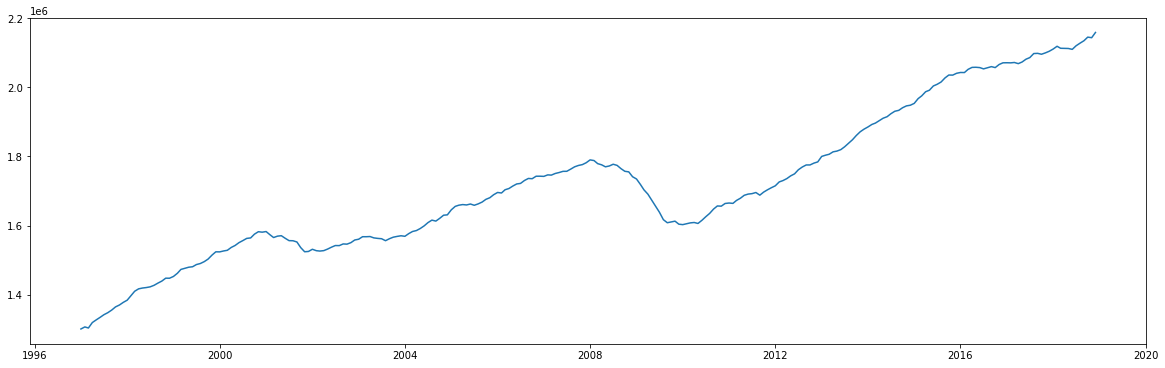

In [27]:
plt.figure(figsize=(20,6))
plt.plot(df2)

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
result=seasonal_decompose(df2['Inventories'])

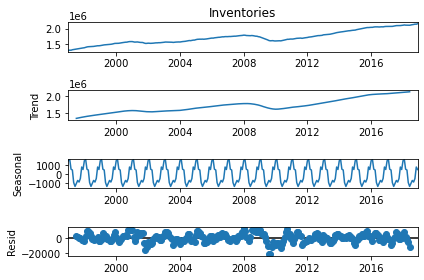

In [31]:
result.plot();

In [33]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sat, 26 Jun 2021   AIC                           5348.037
Time:                        20:27:53   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
from statsmodels.tsa.statespace.tools import diff

In [35]:
df2['Diff']=diff(df2['Inventories'])

In [37]:
df2['Diff']

Date
1997-01-01        NaN
1997-02-01     5919.0
1997-03-01    -3102.0
1997-04-01    15762.0
1997-05-01     7554.0
               ...   
2018-08-01     7552.0
2018-09-01     7002.0
2018-10-01    10467.0
2018-11-01    -1638.0
2018-12-01    15114.0
Freq: MS, Name: Diff, Length: 264, dtype: float64

In [38]:
len(df2)

264

In [47]:
df2=df2.astype('float64')
train_set=df2.iloc[:252]
test_set=df2.iloc[252:]

In [48]:
model=ARIMA(train_set['Inventories'],order=(0,1,0))

C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [49]:
results=model.fit()

In [50]:
len(test_set)

12

In [51]:
predict=results.predict(start=len(train_set),end=len(train_set)+len(test_set)-1,typ='levels')

<AxesSubplot:xlabel='Date'>

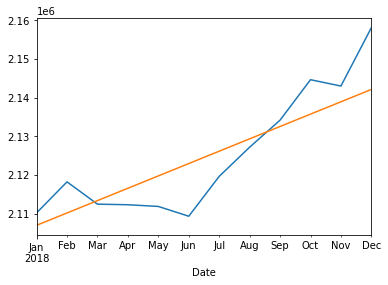

In [54]:
test_set['Inventories'].plot()
predict.plot()

In [55]:
from statsmodels.tools.eval_measures import rmse

In [56]:
error=rmse(test_set['Inventories'],predict)

In [57]:
error

7875.695061456444

In [58]:
test_set['Inventories'].meann()

2125075.6666666665

In [60]:
model=ARIMA(df2['Inventories'],order=(0,1,0))

C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [61]:
results=model.fit()

In [62]:
prediction=results.predict(start=263,end=274,typ='levels')

<AxesSubplot:xlabel='Date'>

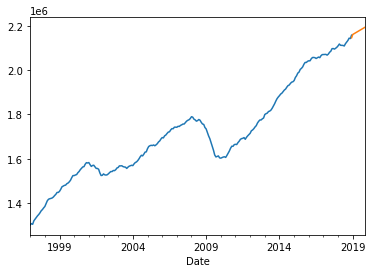

In [63]:
df2['Inventories'].plot()
prediction.plot()